[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.4 CO2-Emissionen stündlich

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [2]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


## Conversion factors
Conversion factors are taken from the OIB RL 6 (2019).

*Hydro, Solar and Wind* were assumed with $f_{PE,n.ern.} = 0$ and $f_{PE,ern.} = 1.$

*Nuclear, Unknown and Battery_Discharge* were assumed with the *Electricity Mix* of $f_{PE,n.ern.} = 0.28$ and $f_{PE,ern.} = 1.32$

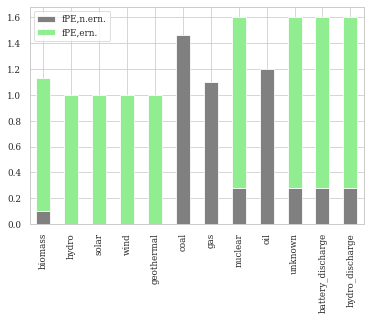

In [4]:
elmap.plot_PE_factors()

C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * PE_factors_OIB2019[src][type]
C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


<AxesSubplot:xlabel='datetime'>

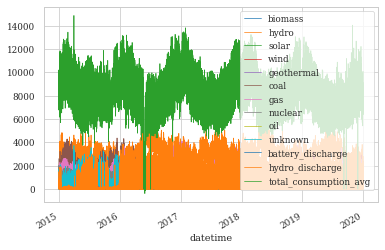

In [5]:
em = elmap.fetch_common()
em.rename(columns={a: b for a, b in zip(elmap.pcs, elmap.sources)}, inplace=True)

PE = elmap.primary_energy(em[elmap.sources])

PE.plot()

In [6]:
fPEs = elmap.pe_factors()

C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:344: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * PE_factors_OIB2019[src][type]
C:\Users\Simon Schneider\PycharmProjects\FLUCCOplus\FLUCCOplus\electricitymap.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


In [7]:
fPEs.mean()

fPE           1.176744
fPE,n.ern.    0.379449
fPE,ern.      0.792726
dtype: float64

In [8]:
fPEs.to_csv(DATA_INTERIM / "fPEs_15-19.csv",
          sep=";",
          decimal=",",
          encoding="cp850")

<AxesSubplot:xlabel='datetime'>

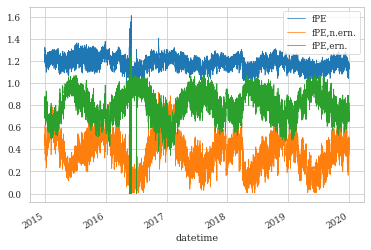

In [9]:
a = elmap.read_interim("fPEs_15-19.csv")
a.plot()